In [1]:
# Unidad 2 - actividad 3

import keras
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


#Generar un conjunto de datos de clasificacion sisntetico:

X,y=make_classification(n_samples=100,n_features=5,n_classes=2)


#division del conjunto de datos

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Convertimos las etiquetas a codificacion one-hot utilizando to_categorical de keras. Esto convierte las etiquetas de clases en vectores binarios 
#donde la posicion de la clase activa es 1 y todas las demas son 0.

y_train_categorical=keras.utils.to_categorical(y_train)
y_test_categorical=keras.utils.to_categorical(y_test)

In [2]:
#creamos el modelo 

model=keras.models.Sequential()




In [3]:
#se a;aden capas al modelo

# #anadir una capa oculta con 10 neuroanas y activacion relu 
model.add(keras.layers.Dense(20,input_shape=(X_train.shape[1],),activation='relu'))  #input_shape=(X_train.shape[1],) el numero de neuronas de capa de entrada siempre se debe escribir en forma de tupla 
#Por ejemplo, si X_train.shape[1] es 10 (es decir, la entrada tiene 10 características), entonces input_shape se define como (10,)
#Esto indica que cada entrada a esta capa tiene 10 características. La tupla (10,) especifica que la entrada es un vector unidimensional con 10 elementos.
# anadir una capa de salida con 2 neuronas (una para cada clase) y activacion softmax:

model.add(keras.layers.Dense(30,activation='relu'))
model.add(keras.layers.Dense(2,activation='softmax'))






c:\Users\jhinn\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# compilar el modelo : 

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#o se podria cambiare el optimizador a model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

#entrenar el modelo 

model.fit(X_train,y_train_categorical,epochs=100,batch_size=42,validation_data=(X_test,y_test_categorical))


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.5413 - loss: 0.6794 - val_accuracy: 0.3500 - val_loss: 0.8041
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5492 - loss: 0.6521 - val_accuracy: 0.3500 - val_loss: 0.7754
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5730 - loss: 0.6318 - val_accuracy: 0.3500 - val_loss: 0.7485
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5579 - loss: 0.6248 - val_accuracy: 0.3500 - val_loss: 0.7222
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6063 - loss: 0.6006 - val_accuracy: 0.3500 - val_loss: 0.6969
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6635 - loss: 0.5740 - val_accuracy: 0.3500 - val_loss: 0.6735
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7044 - loss: 0.5609 - val_accuracy: 0.5000 - val_loss: 0.6508
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7127 - loss: 0.5472 - val_accuracy: 0.5000 - val_loss

In [5]:
#evaluar el modelo :
#Evaluamos el modelo en el conjunto de prueba y obtenemos la pérdida y la precisión.

loss,accuracy=model.evaluate(X_test,y_test_categorical)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9500 - loss: 0.1446


In [1]:
# Actividad No.4

#Ejercicio práctico implementar una red neurobal para regresión utilizando keras


import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt 



In [2]:
housing=fetch_california_housing()

In [4]:
X_train_full,X_test,Y_train_full, y_test=train_test_split(housing.data,housing.target)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,Y_train_full)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('X_valid:', X_valid.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)
print('y_valid:', y_valid.shape)

X_train: (11610, 8)
X_test: (5160, 8)
X_valid: (3870, 8)
y_train: (11610,)
y_test: (5160,)
y_valid: (3870,)


In [5]:
#escalando

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_valid=scaler.transform(X_valid)



In [6]:
#creeando el modelo de red neuronal 
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=(X_train.shape[1],)),
    #keras.layers.Dropout(0.5),  # Añade la capa de dropout con una tasa del 50%
    keras.layers.Dense(1)  # Dado que no se especifica una función de activación, la salida será lineal (sin activación)
])

c:\Users\jhinn\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
#compilar el modelo 

model.compile(loss='mean_squared_error',optimizer='sgd',metrics=[keras.metrics.RootMeanSquaredError(),'mean_absolute_percentage_error'])

In [8]:
history=model.fit(X_train,y_train,epochs=100,validation_data=(X_valid,y_valid))

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.4645 - mean_absolute_percentage_error: 45.1846 - root_mean_squared_error: 1.1816 - val_loss: 0.5865 - val_mean_absolute_percentage_error: 31.7227 - val_root_mean_squared_error: 0.7658
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.8051 - mean_absolute_percentage_error: 33.1533 - root_mean_squared_error: 0.8869 - val_loss: 0.6507 - val_mean_absolute_percentage_error: 28.6277 - val_root_mean_squared_error: 0.8067
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.5136 - mean_absolute_percentage_error: 29.0026 - root_mean_squared_error: 0.7163 - val_loss: 0.4284 - val_mean_absolute_percentage_error: 25.8033 - val_root_mean_squared_error: 0.6545
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - loss: 0.4462 - mean_absolute_percentage_error: 27.0725 - root_mean_squared_error: 0.6679 - val_loss: 0.4562 - val_mean_absolute_percentage_error: 26.0538 - val_root_mean_squared_error: 0.6755
Epoch 

<Axes: >

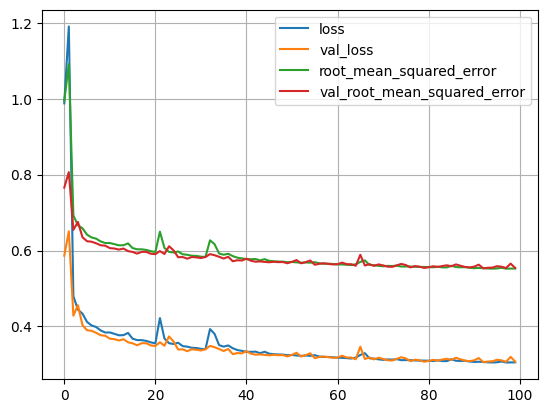

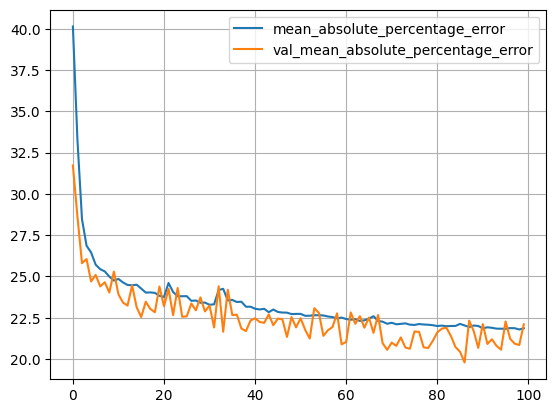

In [9]:
# Graficar el historial de entrenamiento:
dfHistory = pd.DataFrame(history.history)
dfHistory[['loss', 'val_loss', 'root_mean_squared_error', 'val_root_mean_squared_error']].plot(grid=True)
dfHistory[['mean_absolute_percentage_error', 'val_mean_absolute_percentage_error']].plot(grid=True)

#history es un objeto devuelto por el método fit de un modelo de Keras. Este objeto guarda toda la información sobre el
#  proceso de entrenamiento del modelo, 
# incluyendo los valores de las métricas y las pérdidas para cada época.

#history.history es un diccionario que contiene las listas de valores de las métricas registradas durante el entrenamiento y la validación.
#  Las claves del diccionario son los nombres de las métricas, como 'loss', 'val_loss', 'accuracy', etc.,
#  y los valores son listas que contienen los valores de estas métricas para cada época de entrenamiento.

In [10]:
dfHistory

,loss,mean_absolute_percentage_error,root_mean_squared_error,val_loss,val_mean_absolute_percentage_error,val_root_mean_squared_error
0,0.987844,40.143799,0.993903,0.586483,31.722750,0.765822
1,1.190408,33.261116,1.091058,0.650726,28.627682,0.806676
2,0.479551,28.462893,0.692496,0.428405,25.803270,0.654527
3,0.444292,26.863579,0.666552,0.456237,26.053833,0.675453
4,0.433722,26.448097,0.658576,0.403248,24.697792,0.635018
...,...,...,...,...,...,...
95,0.305613,21.828598,0.552823,0.312241,22.275446,0.558785
96,0.307663,21.868996,0.554674,0.310696,21.223175,0.557401
97,0.305096,21.863573,0.552355,0.306803,20.925476,0.553898
98,0.305232,21.787380,0.552478,0.319920,20.845509,0.565614


In [11]:
# Evaluar el modelo en el conjunto de entrenamiento


#Evalúa el rendimiento del modelo en los conjuntos de entrenamiento, validación y prueba utilizando el método evaluate().
#Este código crea, entrena, evalúa y visualiza el rendimiento de una red neuronal para predecir los precios de las viviendas en California.

loss, RMSE, MAPE = model.evaluate(X_train, y_train)
print("Evaluar el modelo en el conjunto de entrenamiento")
print("loss train:", loss)
print("root_mean_squared_error train:", RMSE)
print("mean_absolute_percentage_error train:", MAPE)

# Evaluar el modelo en el conjunto de validación
loss, RMSE, MAPE = model.evaluate(X_valid, y_valid)
print("Evaluar el modelo en el conjunto de validación")
print("loss valid:", loss)
print("root_mean_squared_error valid:", RMSE)
print("mean_absolute_percentage_error valid:", MAPE)

# Evaluar el modelo en el conjunto de prueba
loss, RMSE, MAPE = model.evaluate(X_test, y_test)
print("Evaluar el modelo en el conjunto de prueba")
print("loss test:", loss)
print("root_mean_squared_error test:", RMSE)
print("mean_absolute_percentage_error test:", MAPE)




363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - loss: 0.3021 - mean_absolute_percentage_error: 22.9918 - root_mean_squared_error: 0.5495
Evaluar el modelo en el conjunto de entrenamiento
loss train: 0.3025945723056793
root_mean_squared_error train: 0.5500859618186951
mean_absolute_percentage_error train: 22.725467681884766
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - loss: 0.3001 - mean_absolute_percentage_error: 22.8329 - root_mean_squared_error: 0.5478
Evaluar el modelo en el conjunto de validación
loss valid: 0.3071610629558563
root_mean_squared_error valid: 0.5542211532592773
mean_absolute_percentage_error valid: 22.101289749145508
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - loss: 0.3238 - mean_absolute_percentage_error: 22.8485 - root_mean_squared_error: 0.5689
Evaluar el modelo en el conjunto de prueba
loss test: 0.3275212049484253
root_mean_squared_error test: 0.5722947120666504
mean_absolute_percentage_error test: 22.6940860748291


 1. ¿Qué función de activación se utiliza en la capa oculta de la red neuronal y por qué se elige esa
función?
ChatGPT Plus
ChatGPT
En el modelo que has proporcionado, la capa oculta utiliza la función de activación ReLU ('relu'), que es la abreviatura de Rectified Linear Unit.

Razones para elegir ReLU:
Simplicidad y eficiencia computacional:

ReLU es una función muy simple y eficiente desde el punto de vista computacional porque solo necesita comparar el valor de entrada con cero y decidir si devolverlo o no. Esto permite un entrenamiento más rápido y eficaz, especialmente en redes neuronales profundas.
Resolución del problema de desvanecimiento del gradiente:

A diferencia de funciones de activación como la sigmoide o la tangente hiperbólica (tanh), ReLU no sufre del problema del desvanecimiento del gradiente, donde los gradientes se vuelven extremadamente pequeños, dificultando la actualización de los pesos en las capas anteriores. ReLU mantiene un gradiente constante para valores positivos, lo que ayuda a evitar este problema.
Esparsidad inducida:

ReLU introduce esparsidad en la activación de las neuronas, es decir, para una entrada dada, muchas neuronas pueden estar inactivas (activación igual a 0). Esto puede ayudar a que la red sea más eficiente y a capturar patrones más complejos.
Mejor convergencia:

En general, los modelos entrenados con ReLU tienden a converger más rápidamente que los modelos entrenados con funciones de activación como sigmoide o tanh

2. ¿Qué función de pérdida se utiliza para compilar el modelo y qué métricas se utilizan para
evaluar su rendimiento?

ChatGPT Plus
ChatGPT
La función de pérdida utilizada para compilar el modelo es mean_squared_error (MSE), que es común en problemas de regresión. Las métricas utilizadas para evaluar su rendimiento son root_mean_squared_error (RMSE) y mean_absolute_percentage_error (MAPE).